## Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling (20 pts)

In [3]:
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

In [4]:
import spacy 

spacy.cli.download("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.0 MB/s  0:00:00m0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

## Analysis of Presidential Speeches using the LDA topic model

In [8]:
sou = pd.read_csv('data/SOTU.csv')
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


In [11]:
nlp = spacy.load("en_core_web_sm")

Here Im preprocessing the speeches, essentially getting rid of noisy words

In [12]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [13]:
processed_docs = sou['Text'].apply(preprocess_text)

In [14]:
dictionary = Dictionary(processed_docs) 
dictionary.filter_extremes(no_below=5, no_above=0.5) # Filter rare/common words 
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [15]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=18, random_state=42, passes=10)

##### Top 10 words for each topic

In [16]:
print("\n--- Real News LDA Topics ---") 
for idx, topic in lda_model.print_topics(-1): 
    print(f"Topic: {idx} \nWords: {topic}\n")


--- Real News LDA Topics ---
Topic: 0 
Words: 0.004*"cent" + 0.004*"june" + 0.004*"gold" + 0.003*"island" + 0.003*"silver" + 0.003*"bond" + 0.003*"method" + 0.003*"convention" + 0.003*"indian" + 0.003*"note"

Topic: 1 
Words: 0.008*"depression" + 0.007*"program" + 0.007*"recovery" + 0.006*"budget" + 0.006*"unemployment" + 0.006*"loan" + 0.006*"activity" + 0.006*"farm" + 0.005*"emergency" + 0.005*"cent"

Topic: 2 
Words: 0.008*"dictator" + 0.005*"expression" + 0.004*"british" + 0.004*"1914" + 0.003*"impressive" + 0.003*"actual" + 0.003*"revolution" + 0.003*"schedule" + 0.003*"continent" + 0.003*"partisanship"

Topic: 3 
Words: 0.008*"forest" + 0.007*"corporation" + 0.005*"judge" + 0.005*"wrong" + 0.005*"interstate" + 0.004*"employee" + 0.003*"bureau" + 0.003*"body" + 0.003*"mountain" + 0.003*"island"

Topic: 4 
Words: 0.017*"program" + 0.014*"soviet" + 0.009*"1980" + 0.009*"u.s." + 0.008*"area" + 0.007*"major" + 0.006*"goal" + 0.006*"commitment" + 0.006*"challenge" + 0.006*"nuclear"

T

##### Lets now look at the topic distribution for the very first speech:

In [20]:
topic_dist  = lda_model.get_document_topics(corpus[0])
print(topic_dist)

[(11, np.float32(0.99942815))]


##### This tells us that essentially all of the speech of focused on topic 11 (assigned a weight of 0.999942815). It appears to be emphasising 9/11.

## Distribution of Topics Across Presidential Speeches, and the words associated with them

In [21]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.124490 -0.021460       1        1  25.616654
6     -0.177721  0.042077       2        1  19.986914
5      0.215260  0.071386       3        1   9.900473
7      0.135347 -0.070053       4        1   9.756076
8     -0.048065 -0.119211       5        1   7.286779
17    -0.174387  0.056450       6        1   5.732386
13    -0.173280  0.057692       7        1   5.117117
9     -0.065566 -0.065617       8        1   3.673887
11     0.221114  0.096518       9        1   3.313356
12     0.108985 -0.107040      10        1   3.207706
4      0.170987 -0.059934      11        1   2.417542
3     -0.048335 -0.061174      12        1   1.965267
1      0.001805 -0.137938      13        1   1.024364
14     0.149811  0.117592      14        1   0.773036
15    -0.097709  0.071397      15        1   0.174832
2     -0.030759  0.033480      16        1   0.045779
10    -0.027617  0.048256      17        1   0.003916
16    -0.035383  0.047579      18        1   0.003916, topic_info=           Term         Freq        Total Category  logprob  loglift
509     program  1272.000000  1272.000000  Default  30.0000  30.0000
978      mexico   852.000000   852.000000  Default  29.0000  29.0000
31    americans   990.000000   990.000000  Default  28.0000  28.0000
5330    article   492.000000   492.000000  Default  27.0000  27.0000
666     tonight   666.000000   666.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3221     method     0.007818   526.085513  Topic18  -7.4658  -0.9690
664       today     0.007947   576.839573  Topic18  -7.4494  -1.0447
1148    appoint     0.007382   418.999753  Topic18  -7.5231  -0.7986
31    americans     0.008294   990.552931  Topic18  -7.4067  -1.5427
2624       cent     0.007440   613.994410  Topic18  -7.5154  -1.1730

[1281 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
4847      4  0.881702  --the
4847      8  0.080155  --the
3170      1  0.132806   11th
3170      2  0.079683   11th
3170      6  0.292172   11th
...     ...       ...    ...
744       9  0.116609  young
744      10  0.003239  young
744      11  0.016196  young
744      12  0.009717  young
744      14  0.009717  young

[5611 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 6, 8, 9, 18, 14, 10, 12, 13, 5, 4, 2, 15, 16, 3, 11, 17])

## Analysis of Presidential Speeches using the BERTopic model

In [73]:
docs = sou['Text'].to_list()

##### Here, Im initializing the BERTopic model and fitting it to the dataframe of presidential speeches. Im also removing any stop words from the model output.

In [74]:
vectorizer = CountVectorizer(stop_words = 'english')
BERT_topic_model = BERTopic(min_topic_size = 3)
topics, weights = BERT_topic_model.fit_transform(docs)
BERT_topic_model.update_topics(docs, vectorizer_model = vectorizer)



##### Top 10 words for Each Topic

In [93]:
topic_info = BERT_topic_model.get_topic_info()

topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,38,-1_government_states_united_congress,"[government, states, united, congress, year, w...",[\nTo the Senate and House of Representatives:...
1,0,90,0_world_america_new_people,"[world, america, new, people, years, american,...","[\nMr. President, Mr. Speaker, Members of the ..."
2,1,17,1_government_public_congress_work,"[government, public, congress, work, great, na...",[\nTo the Senate and House of Representatives:...
3,2,16,2_government_states_united_congress,"[government, states, united, congress, law, ye...",[\nTo the Senate and House of Representatives:...
4,3,12,3_states_united_war_congress,"[states, united, war, congress, great, governm...",[\nFellow-Citizens of the Senate and House of ...
5,4,9,4_government_states_public_general,"[government, states, public, general, united, ...",[\nFellow-Citizens of the Senate and House of ...
6,5,6,5_states_government_united_public,"[states, government, united, public, congress,...",[\nTo the Congress of the United States:\nAs y...
7,6,5,6_government_states_united_congress,"[government, states, united, congress, year, c...",[\nTo the Senate and House of Representatives ...
8,7,5,7_mexico_states_texas_united,"[mexico, states, texas, united, government, co...",[\nFellow Citizens of the Senate and of the Ho...
9,8,5,8_bank_public_states_government,"[bank, public, states, government, country, su...",[\nFellow-Citizens of the Senate and House of ...


##### Here Im plotting the distrubution of topics across the very first speech

In [76]:
# Get distribution for the first speech
topic_distr, _ = BERT_topic_model.approximate_distribution(docs)

# Visualize
BERT_topic_model.visualize_distribution(topic_distr[0])

Naturally, the topic with the most weight here has mentions of the world in tandem with mentions of America

### Distribution of Topics across Presidential Elections

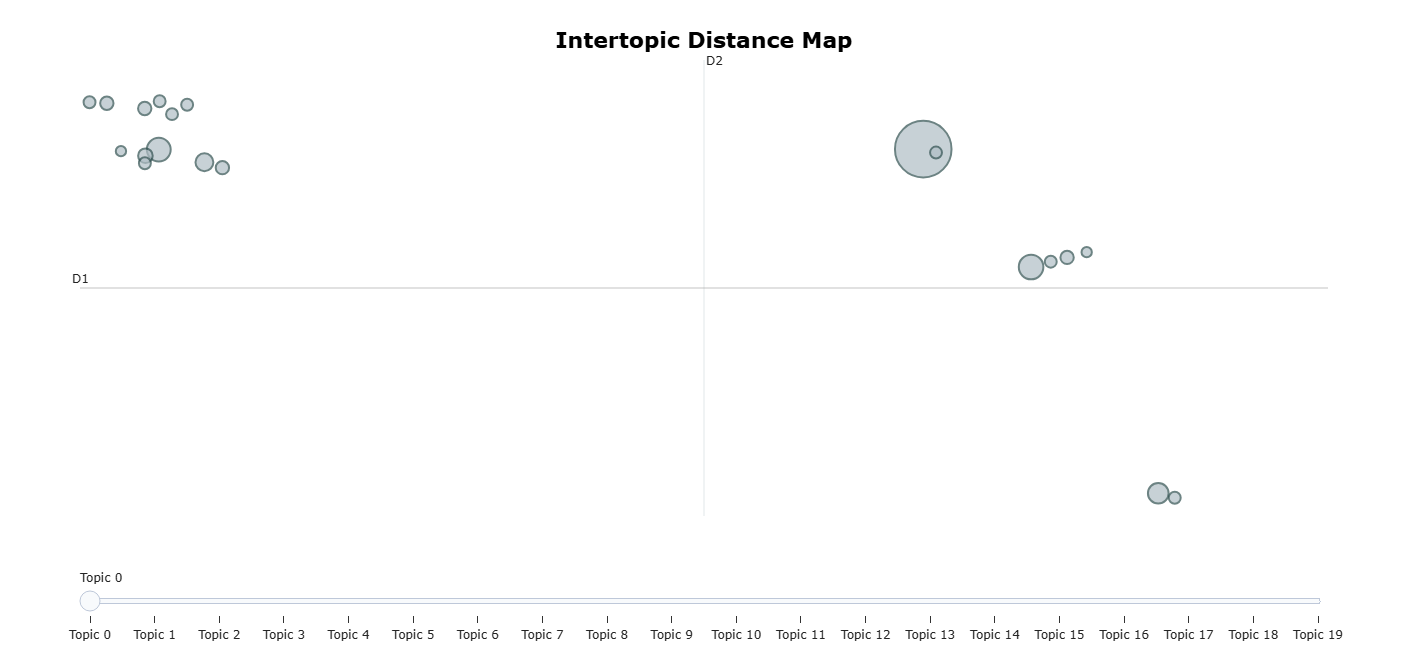

In [77]:
BERT_topic_model.visualize_topics()

This reflects what we saw earlier in the distribution of topics for the first speech. The most overwhelmingly dominant topic in presidential speeches is America.